In [1]:
from display import STMimagePlot,STMspecPlot,STMgridPlot
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML, display
import warnings
warnings.filterwarnings("ignore")

In [3]:
myDir,myFolder,myfileName="../../../STMdata","20230117","SiC158.sxm"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)

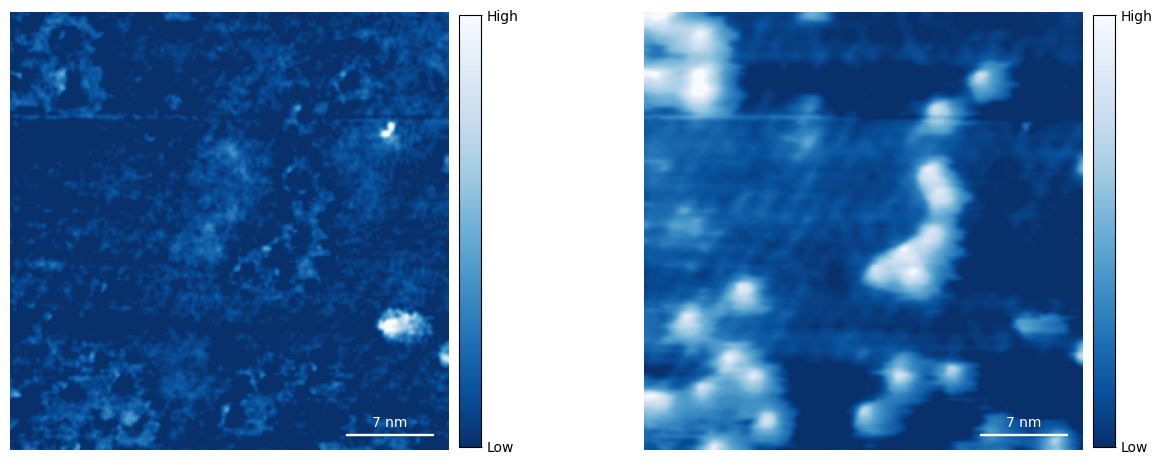

In [8]:
myDir,myFolder,myfileName="../../../STMdata","20221116","SiC040.sxm"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)
fig,ax=plt.subplots(1,2,figsize=(15,7))
Myimage.display_topo(fig,ax[0],channel="LIY_1_omega_forward",imagetitle="",sig=0.75,isgauss=True,sigma=1,iscorrect=True,isscalebar=True,iscolorbar=True)
Myimage.display_topo(fig,ax[1],channel="Z_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=True,isscalebar=True,iscolorbar=True)
fig.savefig('./svg_folder/forward5.svg', dpi=600,format="svg", metadata=None,transparent=True,
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

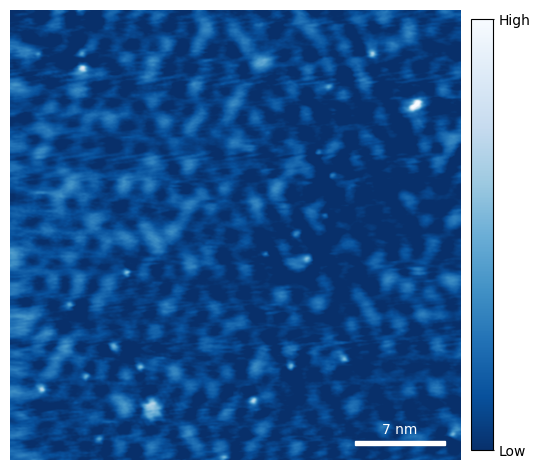

In [5]:
myDir,myFolder,myfileName="../../../STMdata","20221116","SiC042.sxm"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)
fig,ax=plt.subplots(1,1,figsize=(7,7))
#Myimage.display_topo(fig,ax[0],channel="LIY_1_omega_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=True,isscalebar=True,iscolorbar=True)
Myimage.display_topo(fig,ax,channel="Z_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=True,isscalebar=True,iscolorbar=True)
fig.savefig('./svg_folder/forward5.svg', dpi=600,format="svg", metadata=None,transparent=True,
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

In [5]:
Myimage.display_meta_data()

In [7]:
myDir,myFolder,myfileName="../../../STMdata","20221116","Bias-Spectroscopy155.dat"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Myspec=STMspecPlot(filePath=filePath,dataseName=databaseName)

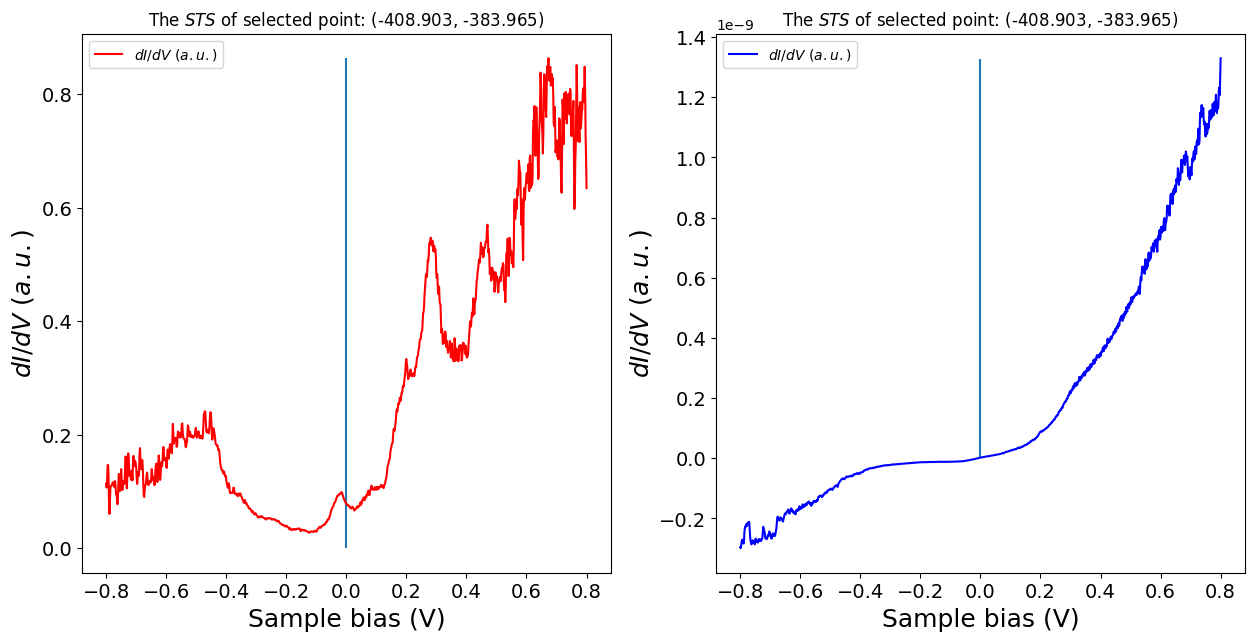

In [10]:
fig, ax= plt.subplots(1,2,figsize=(15,7))
Myspec.display_single_spec(fig,ax[0],channel="LIY_1_omega_forward",biasvalue=-00,isnormolize=True,isgauss=True,sigma=1,color="r",spectitle="",isline=True)
Myspec.display_single_spec(fig,ax[1],channel="Current_forward",biasvalue=-0,isnormolize=False,isgauss=True,sigma=1,color="b",spectitle="",isline=True)

In [9]:
Myspec.display_meta_data()

In [2]:
myDir,myFolder,myfileName="../../../STMdata","20221116","Grid Spectroscopy016.3ds"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Mygrid=STMgridPlot(filePath=filePath,dataseName=databaseName)

In [112]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

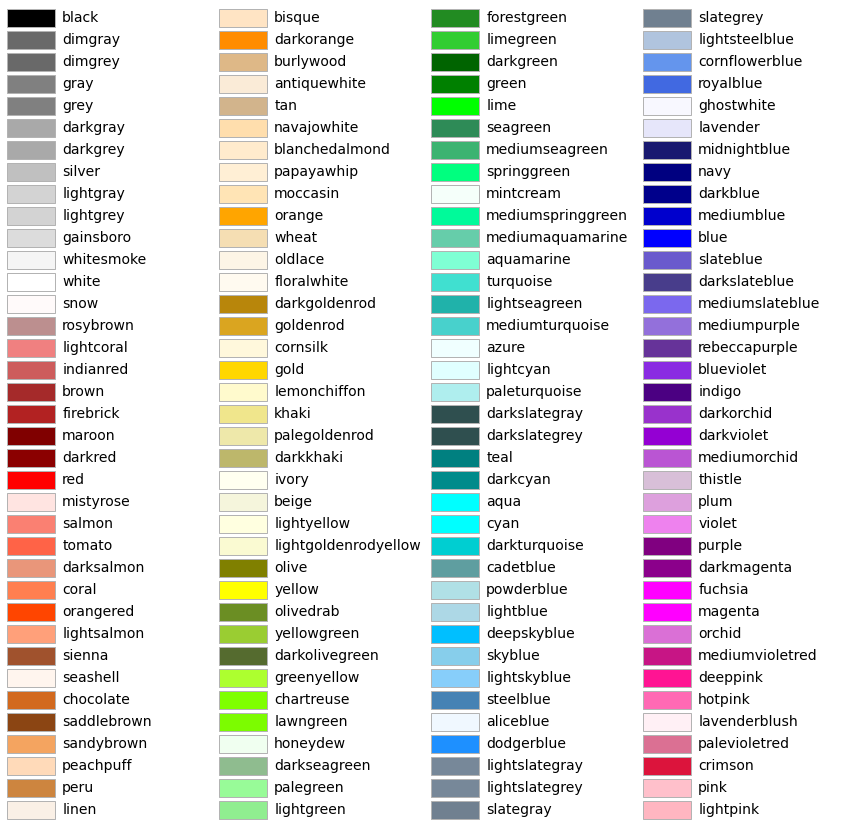

In [10]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [82]:
35/55

0.6363636363636364

In [7]:
from scipy.ndimage import gaussian_filter
from scipy import interpolate
def plot_STS_line_hotmap(sweep,raw,fig,ax,color='RdYlBu_r',biastick=[-1.0,-1.2,-1.0,-0.8,-0.6,1],disntick=[0,2,4,6,8],dis=10,lines=[],colorA=["r",'coral',"peachpuff","lightskyblue","royalblue","k",'coral',"grey","yellow"]):
    
    ylabel="Sample bias (V)"
    xlabel="Current (pA)"
    title=r"The hotmap of $STS$ along the cut line"
    dis=dis
    distep=dis/raw.shape[0]
    data=[]
    step=(sweep[-1]-sweep[0])/raw.shape[1]
    biastick=[round(bias,1) for bias in biastick]
    disntick=disntick
    pixtick=[(bias-sweep[0])/step for bias in biastick]
    distick=[int(disn/distep) for disn in disntick]
    for j,cole in enumerate(raw):
        raw_data = cole
        raw_filted=gaussian_filter(raw_data, sigma=0)
        #peak, _ = find_peaks(raw_filted, distance=200)
        #peak_bias = peak*step+sweep[0]
        data.append(raw_filted)
    data=np.array(data)
    Vmin=np.ndarray.min(data) 
    Vmax=np.ndarray.max(data) 
    img=ax.pcolormesh(data.T,cmap=color,zorder=0)
    if len(lines):
        for i, line in enumerate(lines):
            linX,linY=[],[]
            for j,v in enumerate(sweep):
                linX.append(line)
                linY.append(j)
            ax.plot(linX,linY,"--",color=colorA[i],zorder=3)
        
    #ax.contour(data.T,cmap="RdYlBu",zorder=0)
    cb=fig.colorbar(img,ax=ax,orientation="vertical",pad=0.02,shrink=0.8)
    ax.set_yticks(pixtick,biastick)
    ax.set_xticks(distick,disntick)
    cb.ax.yaxis.set_tick_params(size=0.8,labeltop=True) 
    cb.set_ticks([Vmax,Vmin])
    cb.set_ticklabels(["H","L"])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.get_label().set_fontsize(18)
    ax.yaxis.get_label().set_fontsize(18)
    ax.tick_params(axis='y', labelsize=14 )
    ax.tick_params(axis='x', labelsize=14 )
    ax.set_title(title,fontsize=18)

In [3]:
myDir,myFolder,myfileName="../../../STMdata","20221116","Grid Spectroscopy016.3ds"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Mygrid=STMgridPlot(filePath=filePath,dataseName=databaseName)

[35.0, 35.0] [512, 512] [509.685, 544.685, -537.48, -502.48] -509.685 537.48


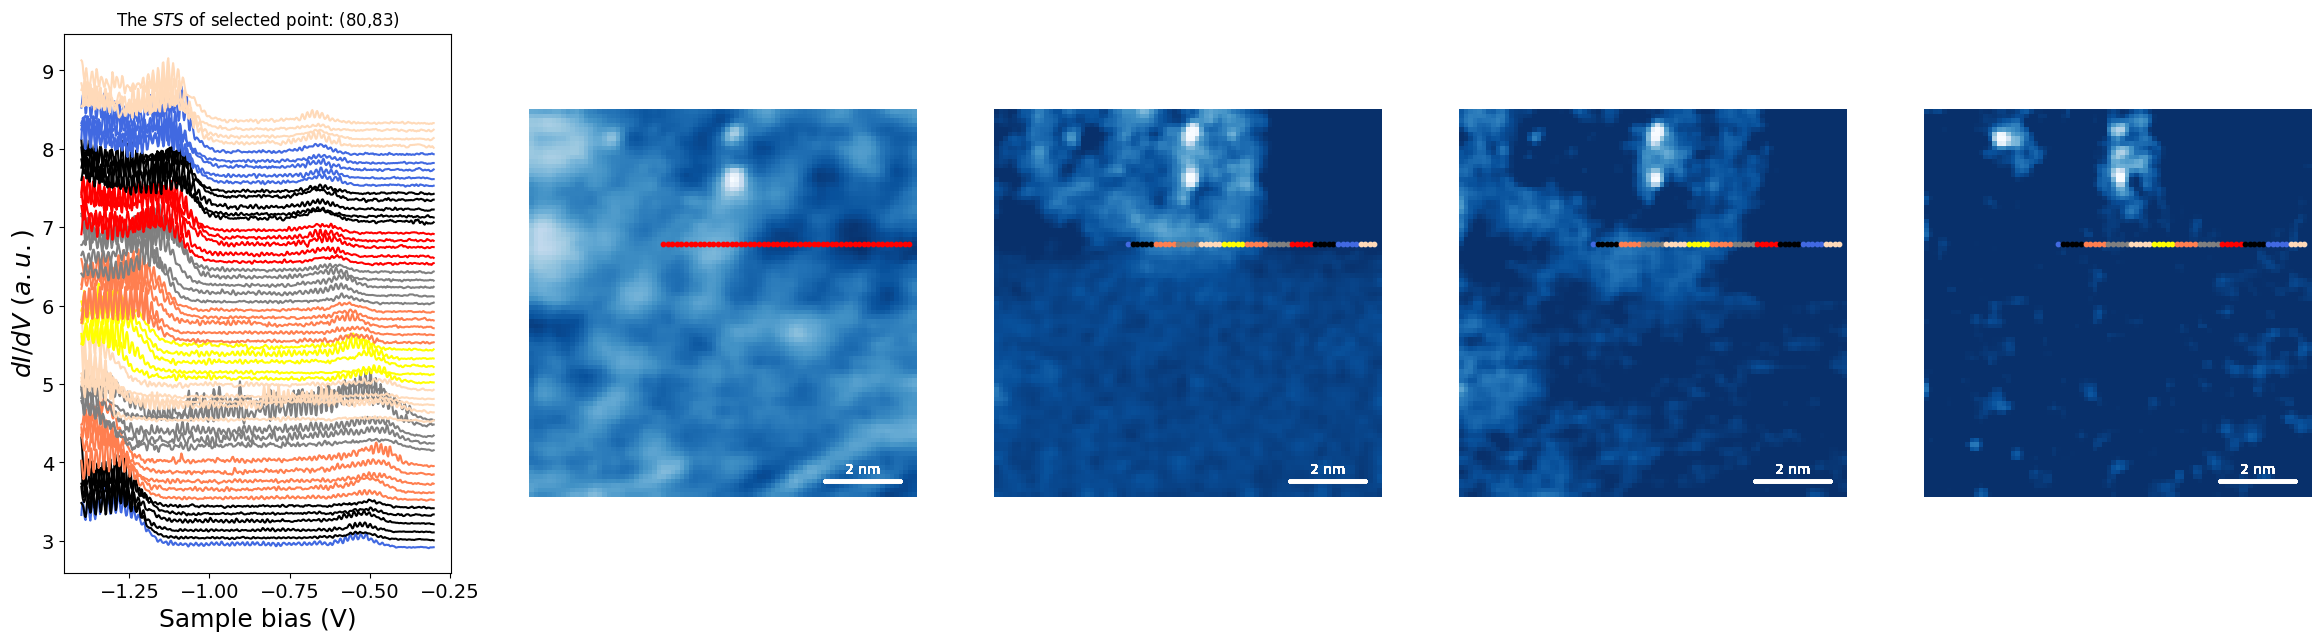

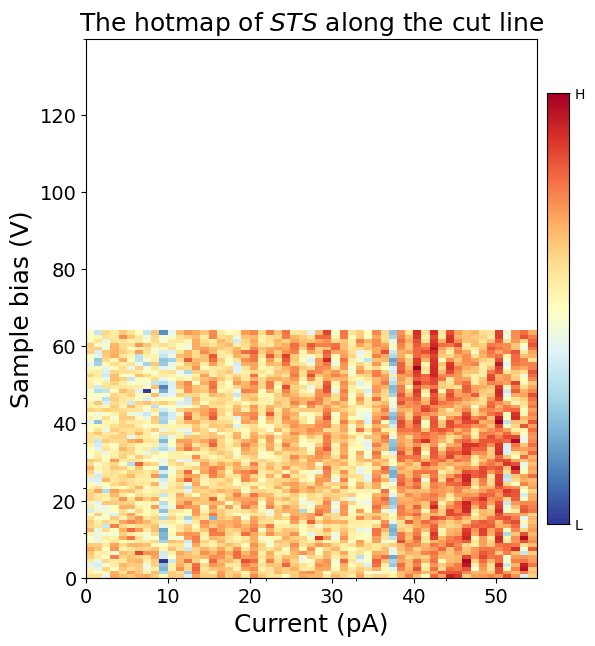

In [38]:
fig, ax= plt.subplots(1,5,figsize=(29,7))
#Myimage.display_topo(fig,ax[2],channel="Z_forward",imagetitle="",sig=0.95,isgauss=True,sigma=1,iscorrect=True,isscalebar=True,iscolorbar=False)
imgrange=Myimage.get_image_range()
nm=Myimage.get_image_size()
pix=Myimage.get_pix()
point=(0,0)
bias,grid=Mygrid.get_grid_value()
print(nm,pix,imgrange,point[0]*nm[0]/pix[0]-imgrange[0],point[1]*nm[0]/pix[0]-imgrange[2])
factor=55/512
color=["r","k","royalblue","peachpuff","lightskyblue","royalblue","k",'coral',"grey","peachpuff","yellow",'coral',"grey","r","k","royalblue","peachpuff","lightskyblue","royalblue","k",'coral',"grey","yellow",'coral',"grey"]
specA=[]
for i in range(29,84):
    start=0
    pix=[55,55]
    point=(i,55)
    counts=i-start
    num=5
    Mygrid.display_single_spec(fig,ax[0],point=(80,i),isnormolize=True,isgauss=True,sigma=1,offset=0.1*i,islegend=False,color=color[counts//num],isline=False,biasvalue=-0.6)
    Mygrid.display_topo(fig,ax[1],imagetitle="",ispoint=True,point=point,isgauss=True,sigma=1,iscolorbar=False)
    specA.append(grid[point[0]][point[1]][20:84])
    
    point_pos= ((point[0]*nm[0]/pix[0]+imgrange[0]),(point[1]*nm[0]/pix[0]+imgrange[2]))
    Mygrid.display_STS_image(fig,ax[2],biasvalue=-0.55,channel="LIY_1_omega",imagetitle="",sig=0.8,isnormolize=True,isaxis=False,isscalebar=True,scalecolor="white",scalesize=0.3,cmap="Blues_r",iscolorbar=False,iscorrect=True,isgauss=True,sigma=1,ispoint=True,point=point,pointcolor=color[counts//num])

    #ax[2].scatter(point_pos[0],point_pos[1],s=10,color=color[counts//num])
    Mygrid.display_STS_image(fig,ax[3],biasvalue=-0.6,channel="LIY_1_omega",imagetitle="",sig=0.8,isnormolize=True,isaxis=False,isscalebar=True,scalecolor="white",scalesize=0.3,cmap="Blues_r",iscolorbar=False,iscorrect=True,isgauss=True,sigma=1,ispoint=True,point=point,pointcolor=color[counts//num])

    Mygrid.display_STS_image(fig,ax[4],biasvalue=-0.75,channel="LIY_1_omega",imagetitle="",sig=0.8,isnormolize=True,isaxis=False,isscalebar=True,scalecolor="white",scalesize=0.3,cmap="Blues_r",iscolorbar=False,iscorrect=True,isgauss=True,sigma=1,ispoint=True,point=point,pointcolor=color[counts//num])
fig, ax= plt.subplots(1,1,figsize=(7,7))
plot_STS_line_hotmap(bias,np.log(specA[::]),fig,ax,color='RdYlBu_r')

In [29]:
myDir,myFolder,myfileName="../../../STMdata","20221116","Grid Spectroscopy014.3ds"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Mygrid=STMgridPlot(filePath=filePath,dataseName=databaseName)

[35.0, 35.0] [512, 512] [509.685, 544.685, -537.48, -502.48] -509.685 537.48


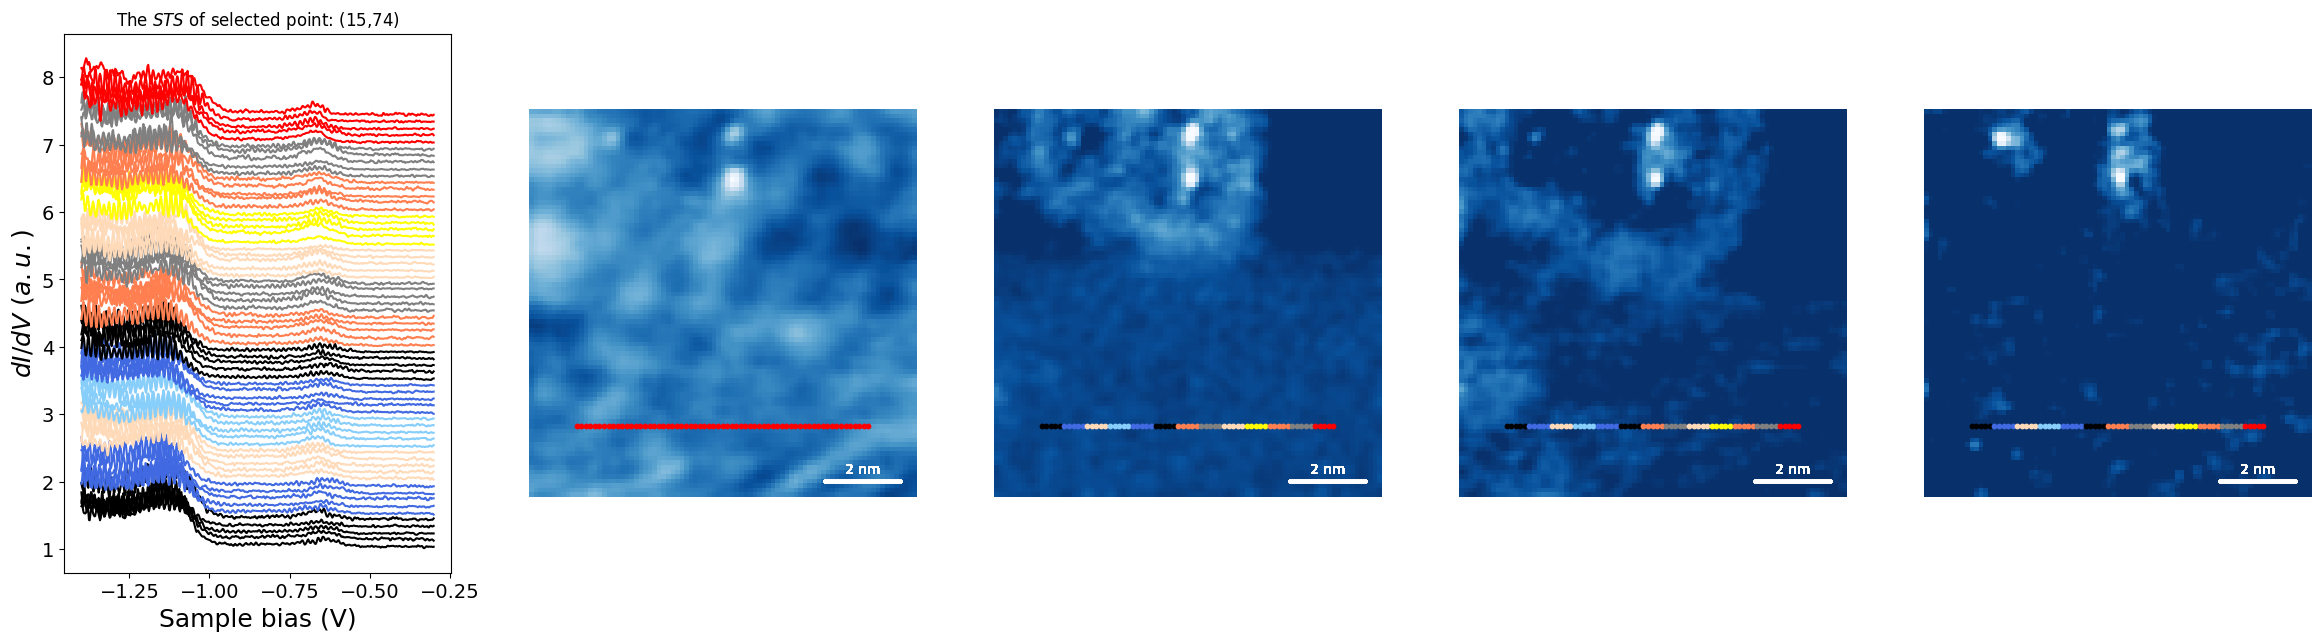

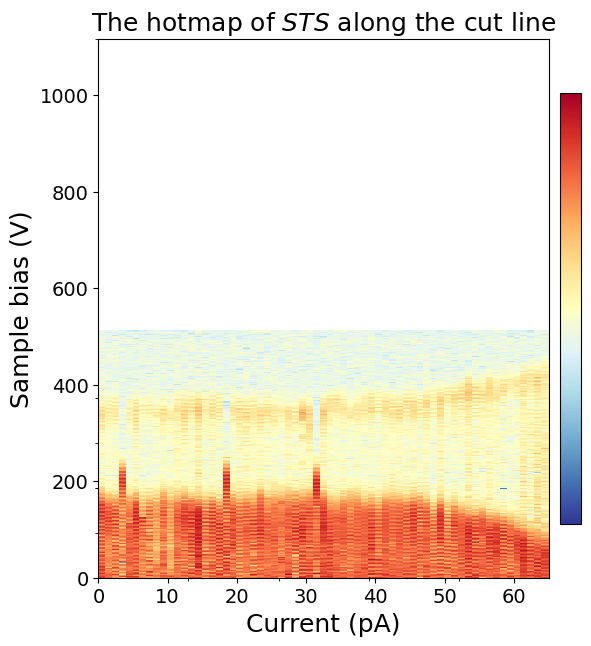

In [30]:
fig, ax= plt.subplots(1,5,figsize=(29,7))
#Myimage.display_topo(fig,ax[2],channel="Z_forward",imagetitle="",sig=0.95,isgauss=True,sigma=1,iscorrect=True,isscalebar=True,iscolorbar=False)
imgrange=Myimage.get_image_range()
nm=Myimage.get_image_size()
pix=Myimage.get_pix()
point=(0,0)
bias,grid=Mygrid.get_grid_value()
print(nm,pix,imgrange,point[0]*nm[0]/pix[0]-imgrange[0],point[1]*nm[0]/pix[0]-imgrange[2])
factor=55/512
color=["r","k","royalblue","peachpuff","lightskyblue","royalblue","k",'coral',"grey","peachpuff","yellow",'coral',"grey","r","k","royalblue","peachpuff","lightskyblue","royalblue","k",'coral',"grey","yellow",'coral',"grey"]
specA=[]
for i in range(10,75,1):
    start=5
    pix=[55,55]
    point=(i,15)
    counts=i-start
    num=5
    Mygrid.display_single_spec(fig,ax[0],point=(15,i),isnormolize=True,isgauss=True,sigma=1,offset=0.1*i,islegend=False,color=color[counts//num],isline=False,biasvalue=-0.6)
    Mygrid.display_topo(fig,ax[1],imagetitle="",ispoint=True,point=point,isgauss=True,sigma=1,iscolorbar=False)
    specA.append(grid[point[0]][point[1]])
    
    point_pos= ((point[0]*nm[0]/pix[0]+imgrange[0]),(point[1]*nm[0]/pix[0]+imgrange[2]))
    Mygrid.display_STS_image(fig,ax[2],biasvalue=-0.55,channel="LIY_1_omega",imagetitle="",sig=0.8,isnormolize=True,isaxis=False,isscalebar=True,scalecolor="white",scalesize=0.3,cmap="Blues_r",iscolorbar=False,iscorrect=True,isgauss=True,sigma=1,ispoint=True,point=point,pointcolor=color[counts//num])

    #ax[2].scatter(point_pos[0],point_pos[1],s=10,color=color[counts//num])
    Mygrid.display_STS_image(fig,ax[3],biasvalue=-0.6,channel="LIY_1_omega",imagetitle="",sig=0.8,isnormolize=True,isaxis=False,isscalebar=True,scalecolor="white",scalesize=0.3,cmap="Blues_r",iscolorbar=False,iscorrect=True,isgauss=True,sigma=1,ispoint=True,point=point,pointcolor=color[counts//num])

    Mygrid.display_STS_image(fig,ax[4],biasvalue=-0.75,channel="LIY_1_omega",imagetitle="",sig=0.8,isnormolize=True,isaxis=False,isscalebar=True,scalecolor="white",scalesize=0.3,cmap="Blues_r",iscolorbar=False,iscorrect=True,isgauss=True,sigma=1,ispoint=True,point=point,pointcolor=color[counts//num])
fig, ax= plt.subplots(1,1,figsize=(7,7))
plot_STS_line_hotmap(bias,np.log(specA[:]),fig,ax,color='RdYlBu_r')

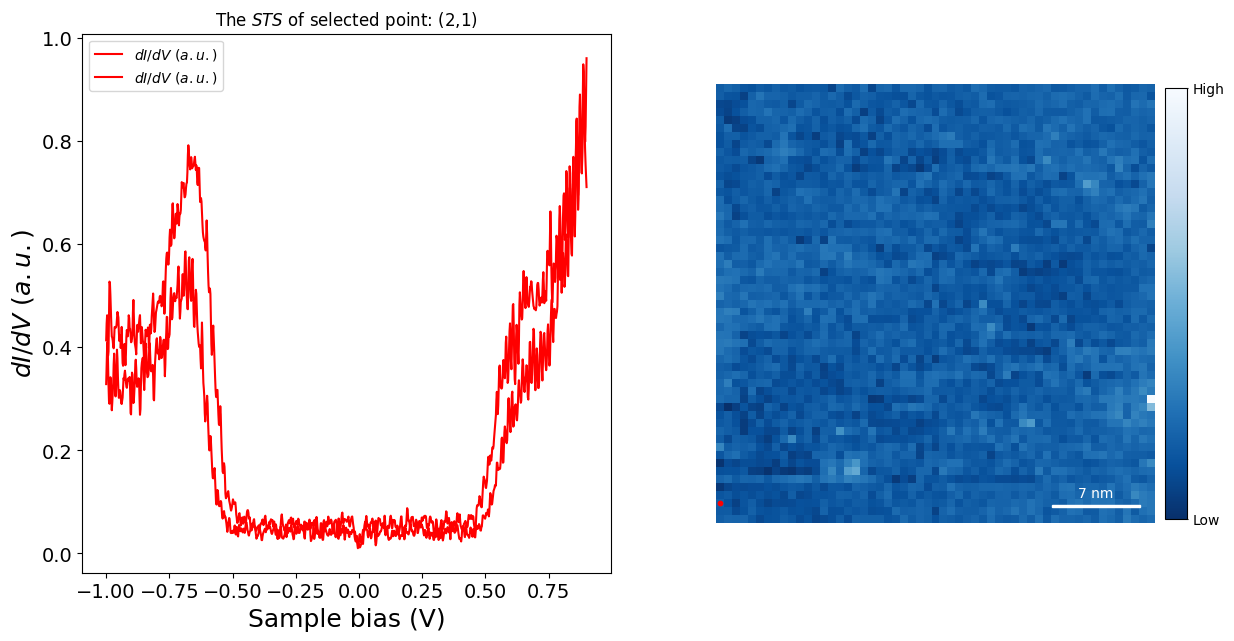

In [12]:
fig, ax= plt.subplots(1,2,figsize=(15,7))
point1,point2,point3=(13,45),(20,45),(25,45)
point1,point2,point3=(0,2),(2,1),(25,45)
Mygrid.display_single_spec(fig,ax[0],point=point1,isnormolize=True,isgauss=True,sigma=1)
Mygrid.display_single_spec(fig,ax[0],point=point2,isnormolize=True,isgauss=True,sigma=1)
Mygrid.display_topo(fig,ax[1],imagetitle="",ispoint=True,point=point1,isgauss=False,sigma=1)

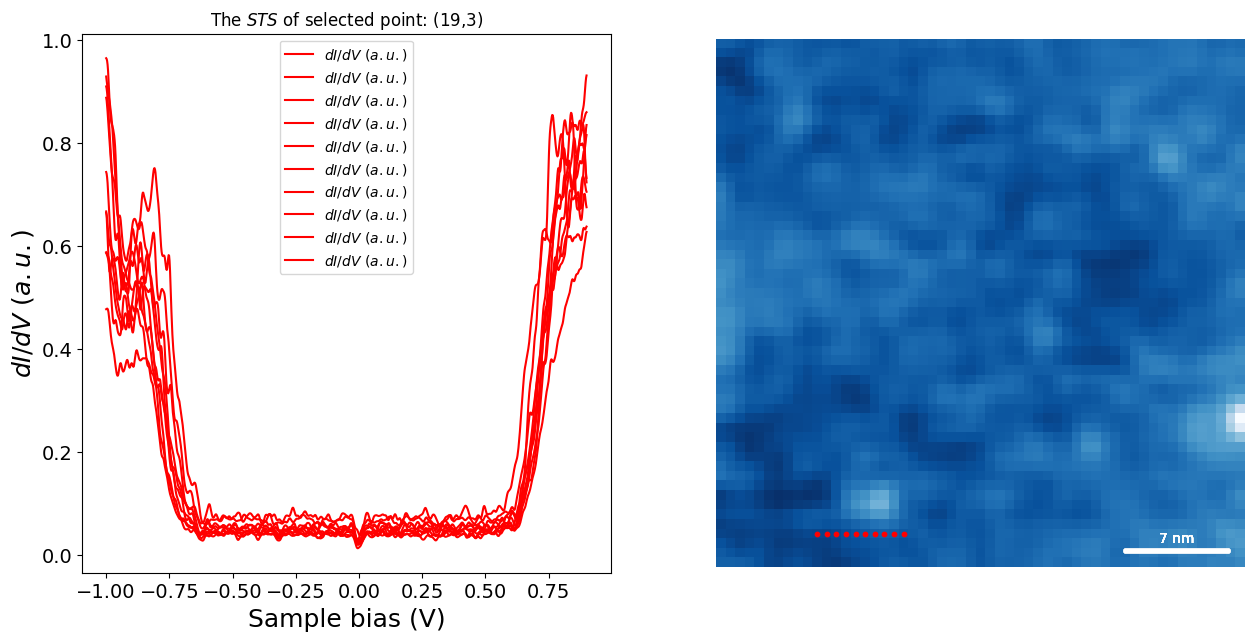

In [17]:
fig, ax= plt.subplots(1,2,figsize=(15,7))
for i in range(10,20):
    point=(i,3)
    Mygrid.display_single_spec(fig,ax[0],point=point,isnormolize=True,isgauss=True,sigma=3)
    Mygrid.display_topo(fig,ax[1],imagetitle="",ispoint=True,point=point,isgauss=True,sigma=1,iscolorbar=False)    


In [10]:
myDir,myFolder,myfileName="../../../STMdata","20221112","Grid Spectroscopy057.3ds"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Mygrid=STMgridPlot(filePath=filePath,dataseName=databaseName)

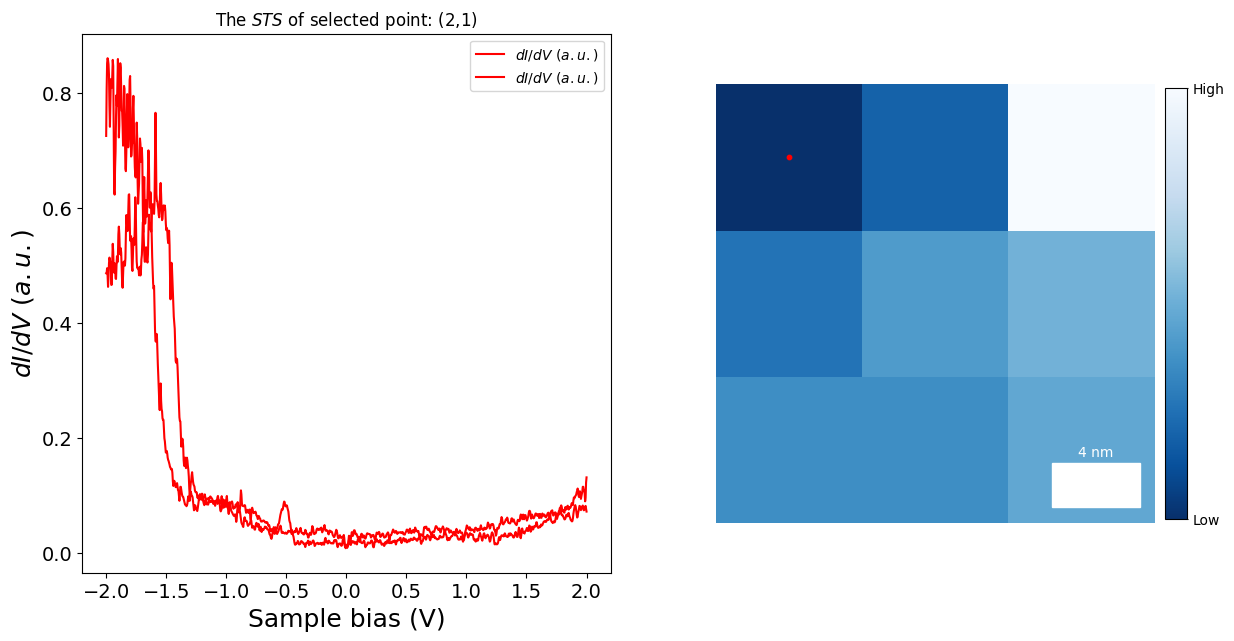

In [16]:
fig, ax= plt.subplots(1,2,figsize=(15,7))
point1,point2,point3=(13,45),(20,45),(25,45)
point1,point2,point3=(0,2),(2,1),(25,45)
Mygrid.display_single_spec(fig,ax[0],point=point1,isnormolize=True,isgauss=True,sigma=1)
Mygrid.display_single_spec(fig,ax[0],point=point2,isnormolize=True,isgauss=True,sigma=1)
Mygrid.display_topo(fig,ax[1],imagetitle="",ispoint=True,point=point1,isgauss=False,sigma=1)


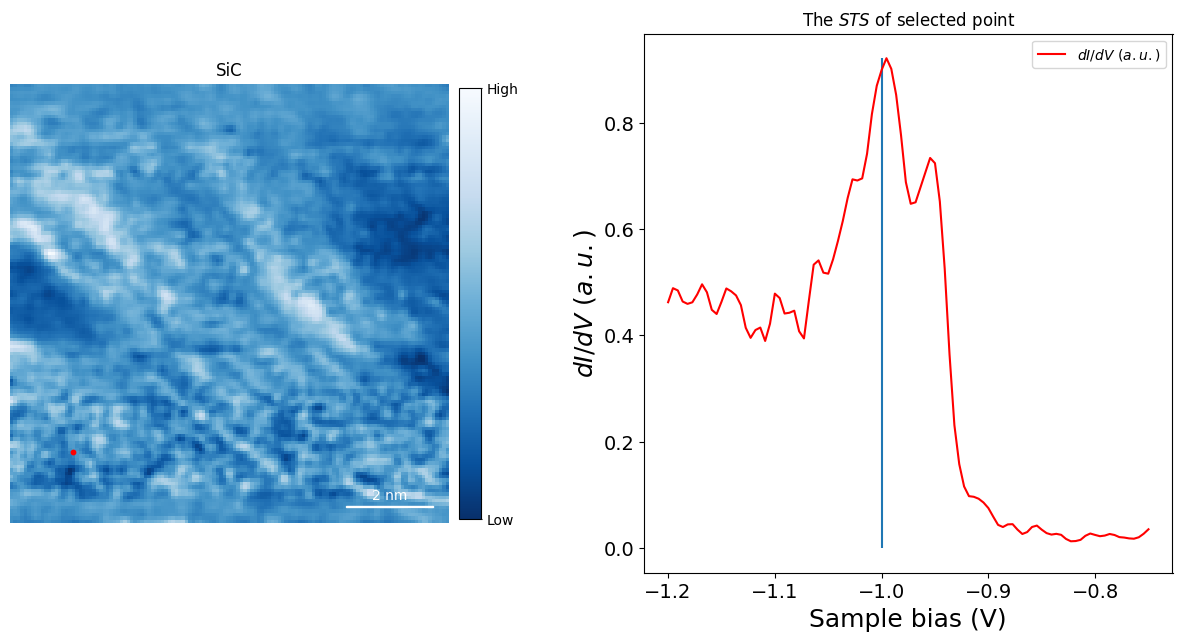

In [19]:
fig, ax= plt.subplots(1,2,figsize=(15,7))
Mygrid.point_spec_with_mapping(fig,ax[0],ax[1],points=[(18,20),],bias=-1.0,colors=["r",'coral',"peachpuff","lightskyblue","royalblue","k",'coral',"grey","yellow"])

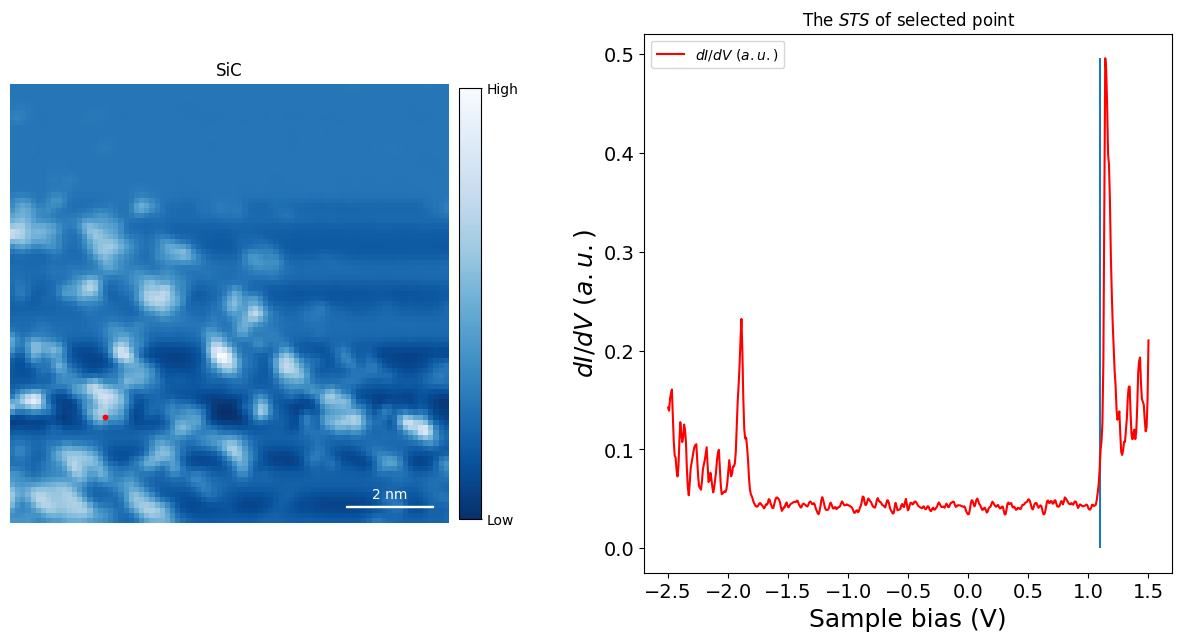

In [3]:
fig, ax= plt.subplots(1,2,figsize=(15,7))
Mygrid.point_spec_with_mapping(fig,ax[0],ax[1],points=[(18,20),],bias=1.1,colors=["r",'coral',"peachpuff","lightskyblue","royalblue","k",'coral',"grey","yellow"])

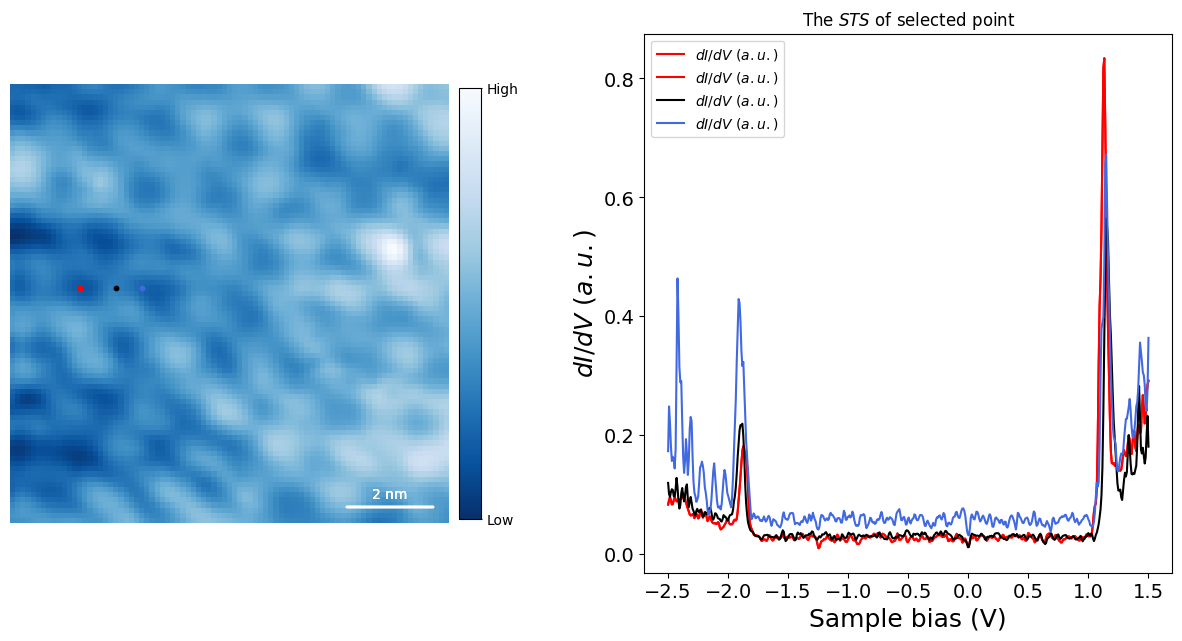

In [8]:
fig, ax= plt.subplots(1,2,figsize=(15,7))
point1,point2,point3=(13,45),(20,45),(25,45)
color=["r","k","royalblue","peachpuff","lightskyblue","royalblue","k",'coral',"grey","yellow",'coral',"grey"]
Mygrid.point_spec_with_topo(fig,ax[0],ax[1],points=[point1,point2,point3],colors=color)


In [7]:
Mygrid.display_meta_data()

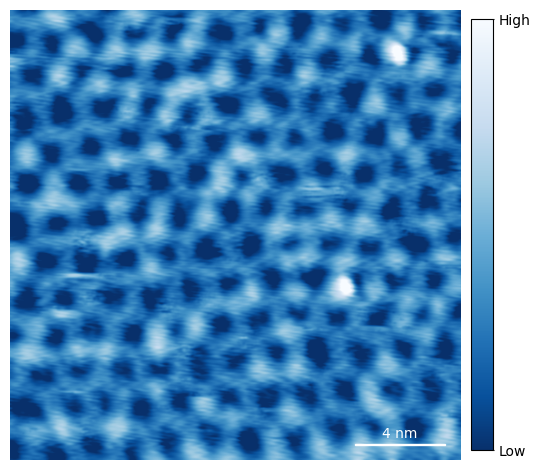

In [2]:
mydir,myFolder,fileName="../../../STMdata","20230223","SiC053.sxm"
filePath=join(mydir,myFolder,fileName)  
databaseName="../../STMdata.db"

Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)
fig,ax=plt.subplots(1,1,figsize=(7,7))
Myimage.display_topo(fig,ax,channel="Z_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)
fig.savefig('./svg_folder/Sic053.svg', dpi=600,format="svg", metadata=None,transparent=True,
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

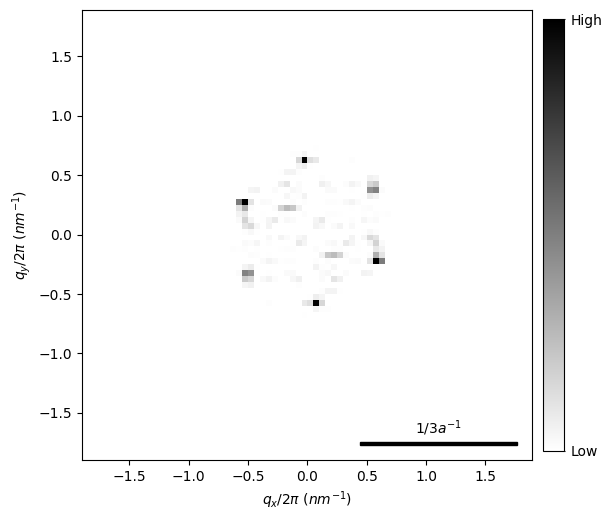

In [8]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
Myimage.display_FT(fig,ax,channel="Z_forward",Z_factor=0.15,title="",sig=0.98,isnormolize=True,isaxis=True,isscalebar=True,scalecolor="white",scalesize=0.02,cmap="gray_r",iscolorbar=True,iscorrect=True,isgauss=True,sigma=1)
fig.savefig('./svg_folder/Sic053_FT.svg', dpi=600,format="svg", metadata=None,transparent=True,
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

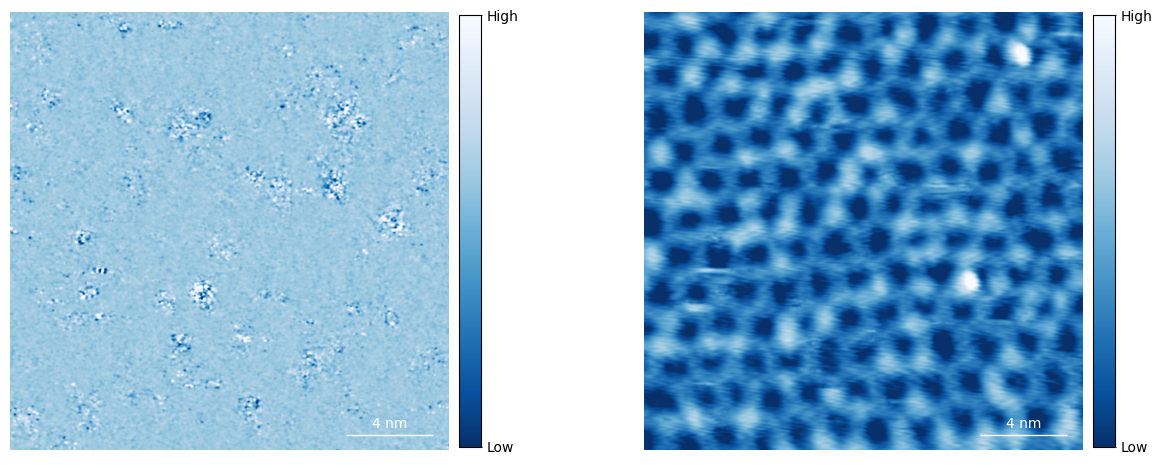

In [34]:
mydir,myFolder,fileName="../../../STMdata","20230223","SiC053.sxm"
filePath=join(mydir,myFolder,fileName)  
databaseName="../../STMdata.db"

Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)
fig,ax=plt.subplots(1,2,figsize=(15,7))
Myimage.display_topo(fig,ax[0],channel="LIY_1_omega_forward",imagetitle="",sig=0.75,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)
Myimage.display_topo(fig,ax[1],channel="Z_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)

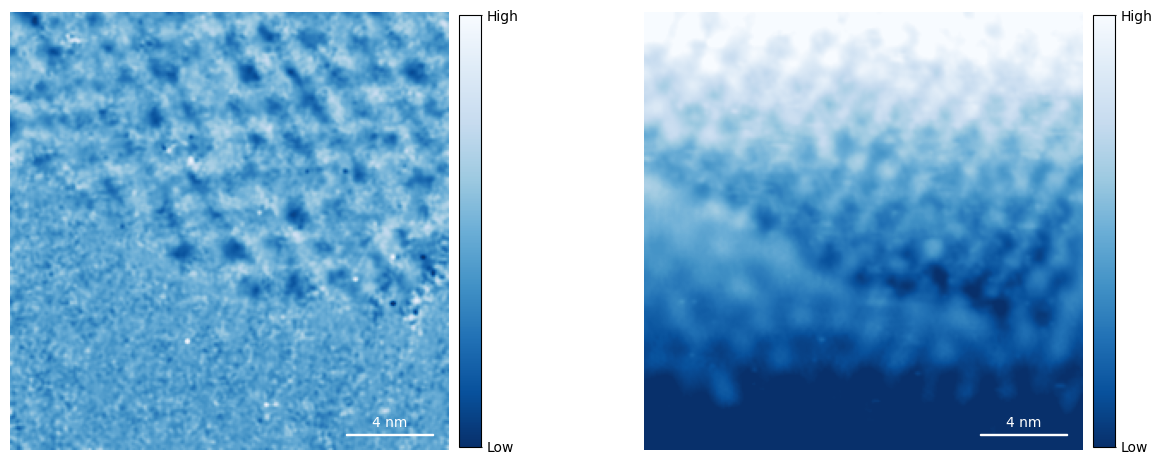

In [8]:
myDir,myFolder,myfileName="../../../STMdata","20230117","SiC160.sxm"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)
fig,ax=plt.subplots(1,2,figsize=(15,7))
Myimage.display_topo(fig,ax[0],channel="LIY_1_omega_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)
Myimage.display_topo(fig,ax[1],channel="Z_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)

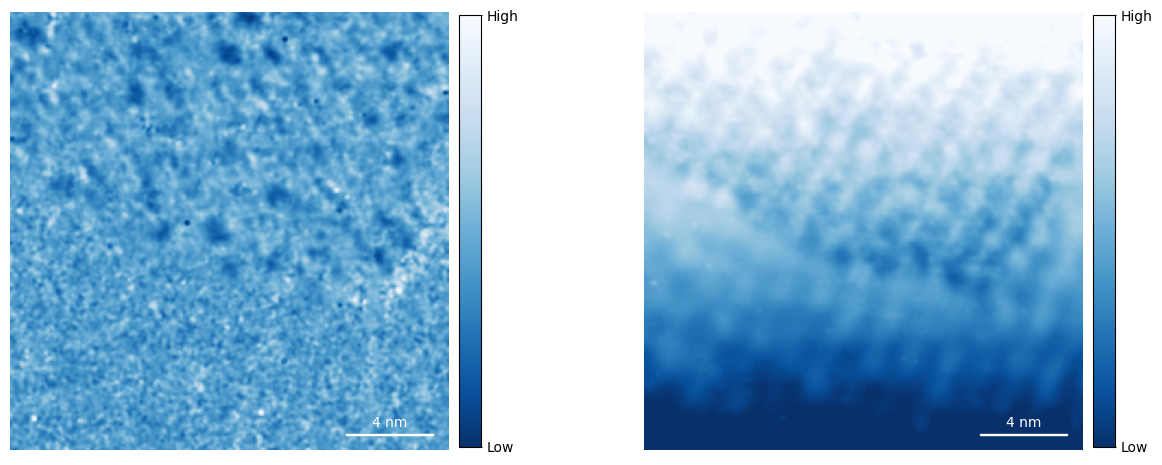

In [9]:
myDir,myFolder,myfileName="../../../STMdata","20230117","SiC162.sxm"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)
fig,ax=plt.subplots(1,2,figsize=(15,7))
Myimage.display_topo(fig,ax[0],channel="LIY_1_omega_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)
Myimage.display_topo(fig,ax[1],channel="Z_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)

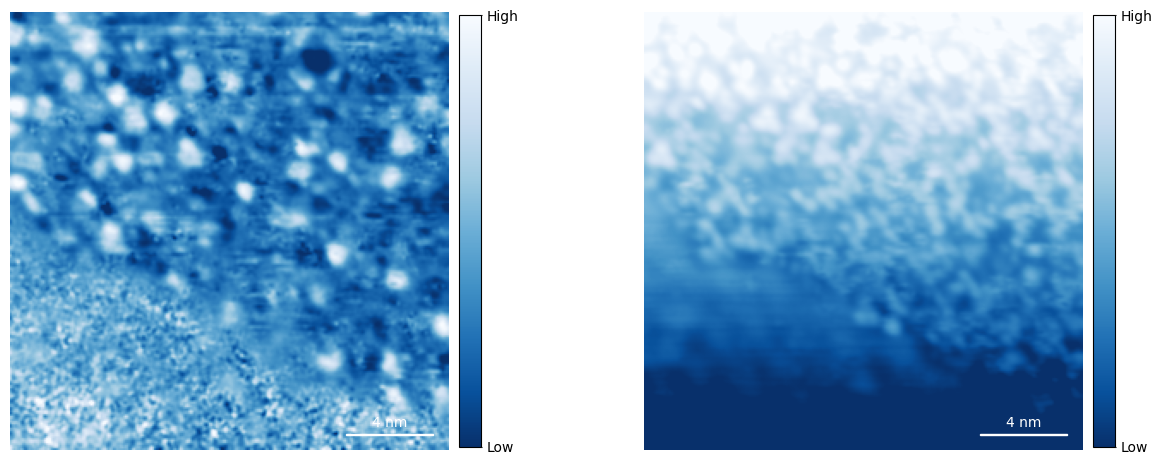

In [10]:
myDir,myFolder,myfileName="../../../STMdata","20230117","SiC152.sxm"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)
fig,ax=plt.subplots(1,2,figsize=(15,7))
Myimage.display_topo(fig,ax[0],channel="LIY_1_omega_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)
Myimage.display_topo(fig,ax[1],channel="Z_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)

In [17]:
Myimage.display_meta_data()

SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20230117/SiC153.sxm'
SUCCESS---------SELECT TimeStamp FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20230117/SiC153.sxm'


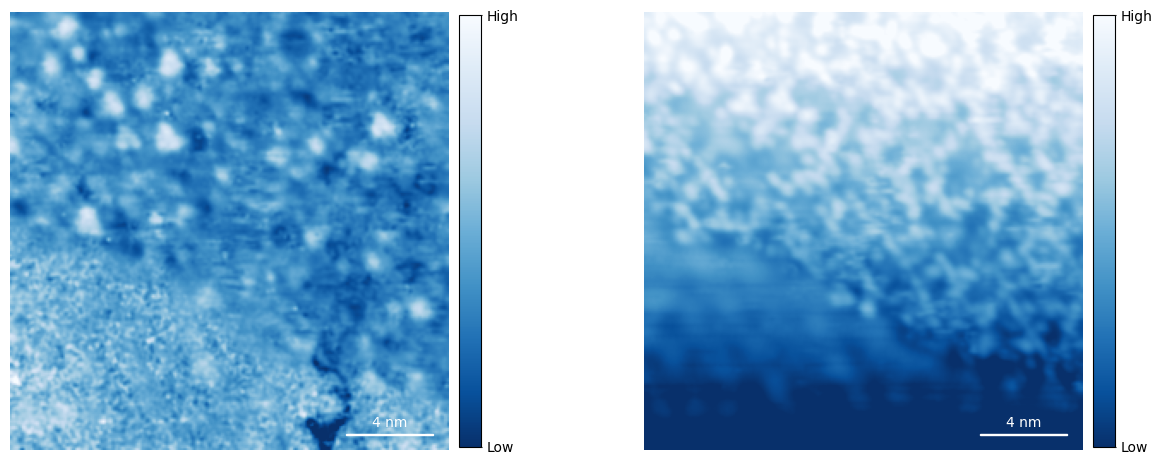

In [11]:
myDir,myFolder,myfileName="../../../STMdata","20230117","SiC153.sxm"   
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)
fig,ax=plt.subplots(1,2,figsize=(15,7))
Myimage.display_topo(fig,ax[0],channel="LIY_1_omega_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)
Myimage.display_topo(fig,ax[1],channel="Z_forward",imagetitle="",sig=0.85,isgauss=True,sigma=1,iscorrect=False,isscalebar=True,iscolorbar=True)

In [5]:
Myimage.display_meta_data()

SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20230117/SiC158.sxm'
SUCCESS---------SELECT TimeStamp FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20230117/SiC158.sxm'


In [2]:
myDir,myFolder,myfileName="../../../STMdata","20221116","SiC028.sxm"
databaseName="../../STMdata.db"
filePath=join(myDir,myFolder,myfileName)
Myimage=STMimagePlot(filePath=filePath,dataseName=databaseName)

SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosX_nm  from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosY_nm from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_RANGE from STMimageInfo WHERE List_ID=5836


SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SELECT Z_forward from STMimageValue WHERE List_ID=5836
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosX_nm  from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosY_nm from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SEL

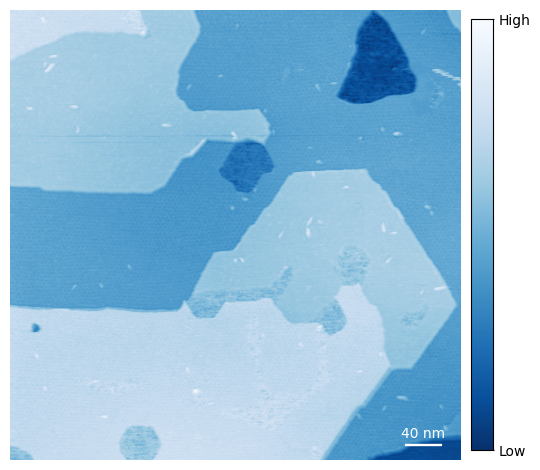

In [7]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
Myimage.display_topo(fig,ax,channel="Z_forward",imagetitle="",isgauss=False,iscorrect=False,isbar=True,iscolorbar=True)
fig.savefig('./svg_folder/forward5.svg', dpi=600,format="svg", metadata=None,transparent=True,
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SELECT Z_forward from STMimageValue WHERE List_ID=5836
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosX_nm  from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosY_nm from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SEL

SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SELECT Z_backward from STMimageValue WHERE List_ID=5836
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosX_nm  from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT PosY_nm from STMdataLists  WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT List_ID FROM STMdataLists WHERE UpdateFilePath='../../../STMdata/20221116/SiC028.sxm'
SUCCESS---------SELECT SCAN_PIXELS from STMimageInfo WHERE List_ID=5836
SUCCESS---------SE

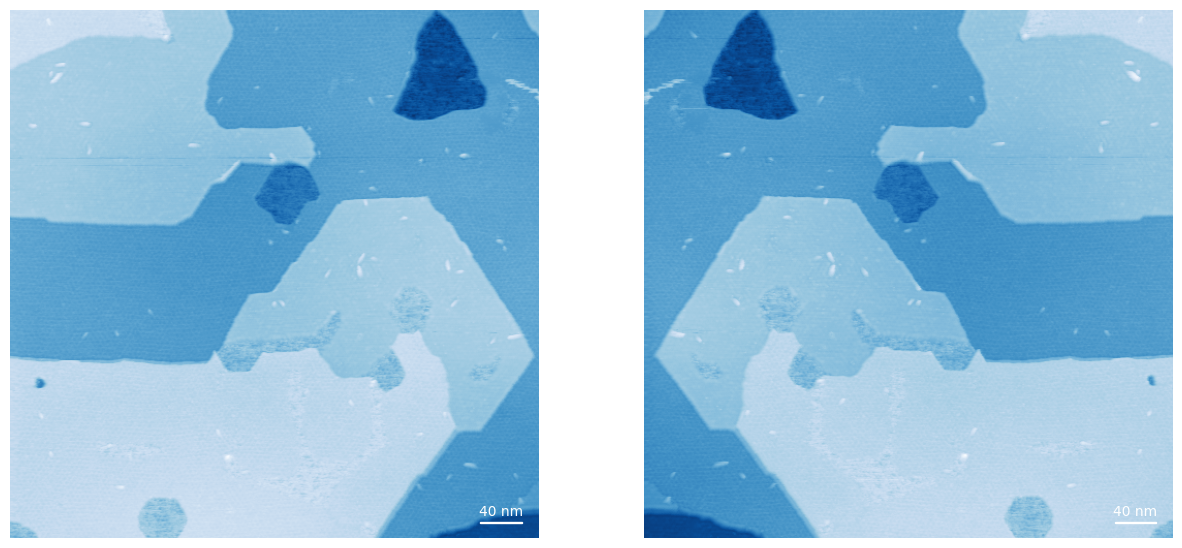

In [8]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
Myimage.display_topo(fig,ax[0],channel="Z_forward",imagetitle="",isgauss=False,iscorrect=False,isbar=True,iscolorbar=False)
Myimage.display_meta_data()
Myimage.display_topo(fig,ax[1],channel="Z_backward",imagetitle="",isgauss=False,iscorrect=False,isbar=True,iscolorbar=False)
fig.savefig('../image_save/forward.svg', dpi=600,format="svg", metadata=None,transparent=True,
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

In [14]:

with open('show_list.html', 'r') as html_file:
    html_content = html_file.read()
display(HTML(html_content))

In [15]:

with open('test.html', 'r') as html_file:
    html_content = html_file.read()
display(HTML(html_content))

In [16]:

with open('index.html', 'r') as html_file:
    html_content = html_file.read()
display(HTML(html_content))

In [17]:

with open('show_index.html', 'r') as html_file:
    html_content = html_file.read()
display(HTML(html_content))